<a href="https://colab.research.google.com/github/starvar7169/leadbasic/blob/main/CustomerSegmentationipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score
data=pd.read_csv("train.csv")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
data.dropna(inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6665 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   object 
 2   Ever_Married     6665 non-null   object 
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   object 
 5   Profession       6665 non-null   object 
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   object 
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   object 
 10  Segmentation     6665 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 624.8+ KB
None


In [ ]:
data_new=data.drop(['Segmentation'], axis=1)
X=data_new.values
Y=data['Segmentation']
X_train, X_test, Y_train, Y_test = train_test_split(
    data.drop("Segmentation", axis=1),
    data["Segmentation"],
    train_size=0.8,
    test_size=0.2,
    random_state=40,
)

Marital Status; Ever_Married
Yes    3944
No     2721
Name: count, dtype: int64


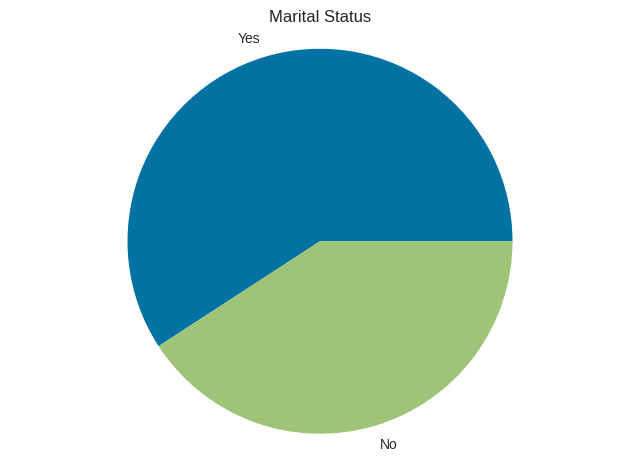

Profession: Profession
Artist           2192
Healthcare       1077
Entertainment     809
Doctor            592
Engineer          582
Executive         505
Lawyer            500
Marketing         233
Homemaker         175
Name: count, dtype: int64


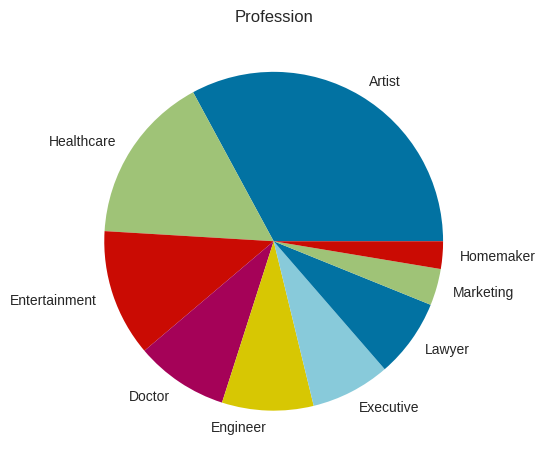

In [ ]:
print("Marital Status;",data['Ever_Married'].value_counts())
plt.pie(data['Ever_Married'].value_counts(), labels=['Yes','No'])
plt.axis('equal')
plt.title('Marital Status')
plt.show()
print("Profession:",data['Profession'].value_counts())
plt.pie(data['Profession'].value_counts(), labels=['Artist','Healthcare','Entertainment','Doctor','Engineer','Executive','Lawyer','Marketing','Homemaker'])
plt.title('Profession')
plt.show()

In [ ]:
data['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
      dtype=object)

In [ ]:
data['Segmentation']=data['Segmentation'].replace({'A':0, 'B':1, 'C':2, 'D':3})
data['Gender']=data['Gender'].replace({'Male':0, 'Female':1})
data['Ever_Married']=data['Ever_Married'].replace({'Yes':1, 'No':0})
data['Graduated']=data['Graduated'].replace({'Yes':1, 'No':0})
data['Spending_Score']=data['Spending_Score'].replace({'Low':0, 'Average':1, 'High':2})
data['Var_1']=data['Var_1'].replace({'Cat_1':1, 'Cat_2':2, 'Cat_3':3, 'Cat_4':4, 'Cat_5':5, 'Cat_6':6, 'Cat_7':7})
data['Profession'] = data['Profession'].replace({'Healthcare': 0, 'Artist': 1, 'Entertainment': 2, 'Doctor': 3, 'Engineer': 4, 'Executive': 5, 'Lawyer': 6, 'Marketing': 7, 'Homemaker': 8})
print(data.head())

       ID  Gender  Ever_Married  Age  Graduated  Profession  Work_Experience  \
0  462809       0             0   22          0           0              1.0   
2  466315       1             1   67          1           4              1.0   
3  461735       0             1   67          1           6              0.0   
5  461319       0             1   56          0           1              0.0   
6  460156       0             0   32          1           0              1.0   

   Spending_Score  Family_Size  Var_1  Segmentation  
0               0          4.0      4             3  
2               0          1.0      6             1  
3               2          2.0      6             1  
5               1          2.0      6             2  
6               0          3.0      6             2  


<Axes: >

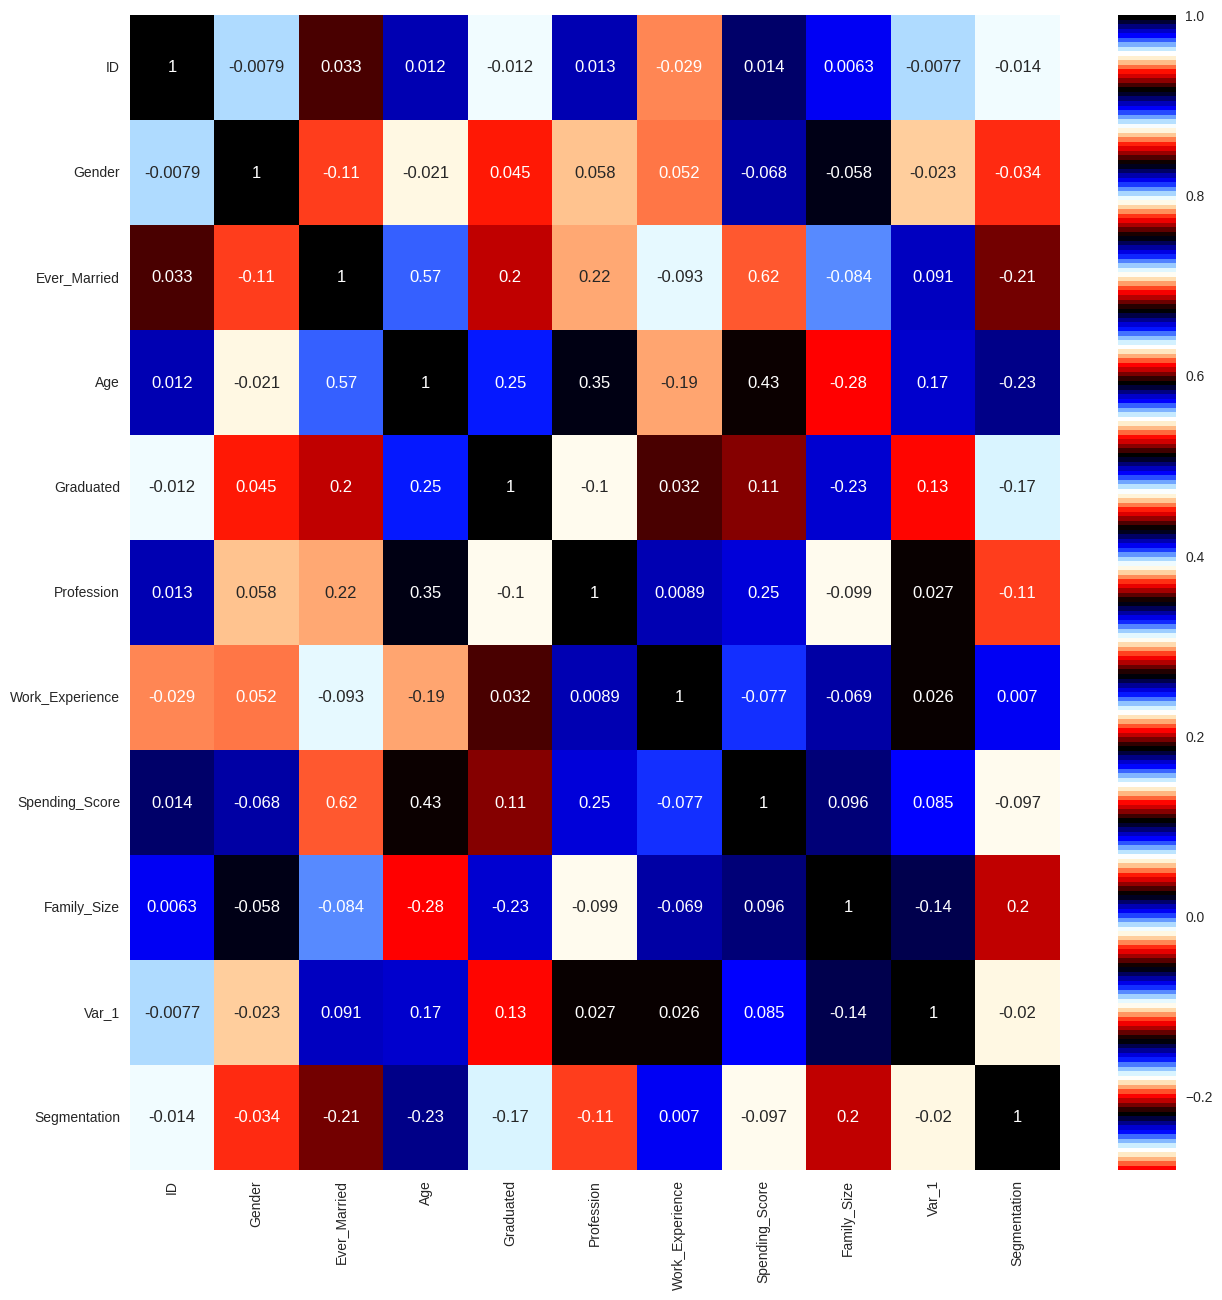

In [ ]:
corr_mat=data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat, annot=True, cmap='flag')

In [21]:
scaler=StandardScaler()
scaler.fit(data)
scaled_data=pd.DataFrame(scaler.transform(data), columns=data.columns)
print(scaled_data)

            ID    Gender  Ever_Married       Age  Graduated  Profession  \
0    -0.276997 -0.901454     -1.203938 -1.303415  -1.326157   -1.117155   
1     1.089204  1.109319      0.830607  1.420092   0.754059    0.691185   
2    -0.695508 -0.901454      0.830607  1.420092   0.754059    1.595355   
3    -0.857613 -0.901454      0.830607  0.754346  -1.326157   -0.665070   
4    -1.310806 -0.901454     -1.203938 -0.698191   0.754059   -1.117155   
...        ...       ...           ...       ...        ...         ...   
6660 -0.201790 -0.901454      0.830607 -0.153490   0.754059   -0.665070   
6661  0.454034 -0.901454     -1.203938 -0.516624  -1.326157    1.143270   
6662  0.734990  1.109319     -1.203938 -0.637669   0.754059   -1.117155   
6663  1.472645  1.109319     -1.203938 -1.000803   0.754059   -1.117155   
6664 -0.639395 -0.901454      0.830607 -0.395579   0.754059    1.143270   

      Work_Experience  Spending_Score  Family_Size     Var_1  Segmentation  
0           -0.478430 

In [24]:
pca=PCA(n_components=3)
pca.fit(scaled_data)
PCA_scaled=pd.DataFrame(pca.transform(scaled_data), columns=['col1', 'col2', 'col3'])
print(PCA_scaled)

          col1      col2      col3
0    -2.775950  1.321128 -0.673886
1     1.688325 -1.427198  0.658420
2     3.074619  0.525900 -0.102901
3     0.777988  0.901433 -0.830361
4    -1.416294 -0.634678 -1.720543
...        ...       ...       ...
6660  1.245296  1.438912 -1.729517
6661 -1.771375  1.491943  0.921703
6662 -1.390778 -1.541342 -0.609966
6663 -1.495509 -0.841519 -0.503736
6664  1.053064  0.746353 -0.048555

[6665 rows x 3 columns]


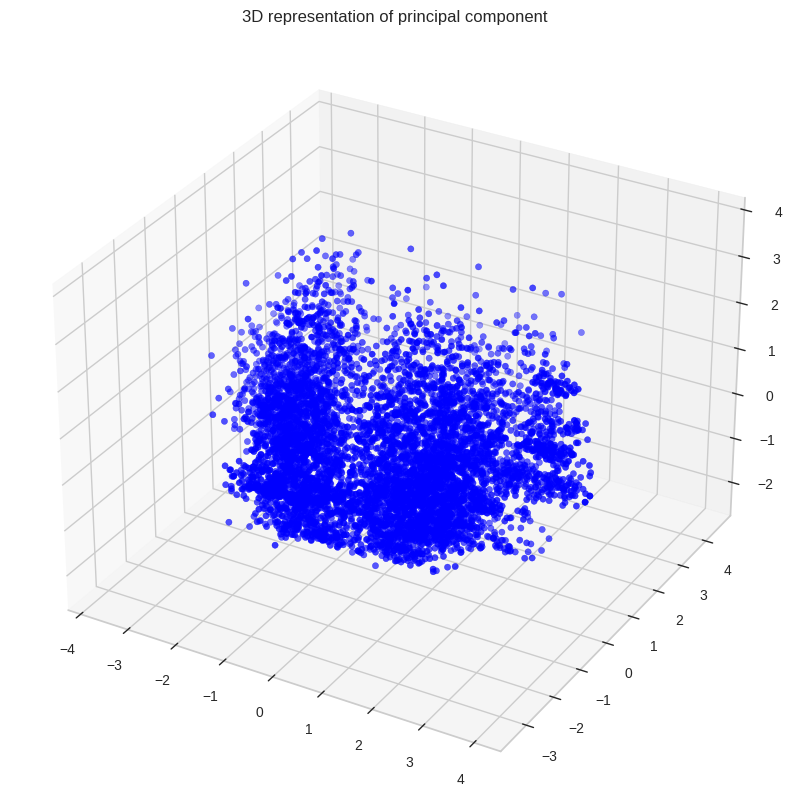

In [32]:
x = PCA_scaled['col1']
y = PCA_scaled['col2']
z = PCA_scaled['col3']
fig=plt.figure(figsize=(10,10))
axes=fig.add_subplot(111, projection='3d')
axes.scatter(x, y, z, color='blue')
axes.set_title('3D representation of principal component')
plt.show()

elbow method to determine accurate number of clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

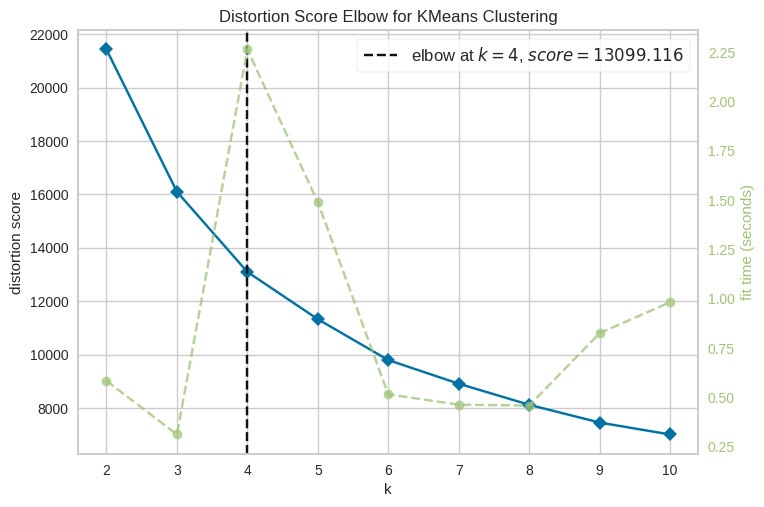

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
Elbow_M= KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_scaled)
Elbow_M.show()

In [34]:
model = KMeans(init='k-means++',
               n_clusters=4,
               max_iter=500,
               random_state=22)
segments = model.fit_predict(PCA_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
pl = sns.countplot(x=data["Clusters"], palette= 'pastel')
pl.set_title("Distribution Of The Clusters")
plt.show()